# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "IAD15"
COLLABORATORS = "Anna Kaniowska 407334, Weronika Matuszek 406887, Ewa Szewczyk 406923, Adam Piwowarski 408133"

---

## Zestaw zadań 10: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE

def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    # counting points within each subregion
    count = []
    for region in subregions['geometry']:
        count.append(points.within(region).sum())
    
    return count
    
    # raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    # calculating insensity of point process within each subregion
    counts = point_count_on_subregions(points, subregions)
    return counts / subregions['geometry'].area 
    
    # raise NotImplementedError()


#raise NotImplementedError()

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu lepiej jest zdobywać informacje na temat wykorzystywanych modułów, klas i funkcji z wykorzystaniem funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Import i przygotowanie danych
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian).

In [5]:
# Kraj
# YOUR CODE HERE

county = gpd.read_file("Powiaty.zip")
county = gpd.GeoDataFrame(county,geometry="geometry")

p1 = gpd.read_file("points_1.zip")
p1 = gpd.GeoDataFrame(p1,geometry="geometry")

p2 = gpd.read_file("points_2.zip")
p2 = gpd.GeoDataFrame(p2,geometry="geometry")


# raise NotImplementedError()

### Zadanie 1: Autokorelacja przestrzenna danych (25 pkt)

Przygotuj funkcję `spatial_autocorelation_data()`, która będzie przygotowywać dane niezbędne do oceny autokorelacji przestrzennej analizowanych danych.

Schemat postępowania:
- zagreguj dane na obszarze poszczegolnych powiatów (ze względu na różnice w powierzchni obszarów skorzystaj z wyliczonych dla nich wartości intensywności, a nie samej liczby zliczeń w ich obrębie),
- wyznacz macierz wag przestrzennych,
- wylicz opóźnienie przestrzenne,
- przygotuj dane niezbędne do wykonania wykresu Morana.

Następnie wykorzystaj przygotowane funkcje do oceny autokorelacji przestrzennej rozkładów punktów z plików points_2.zip i points_3.zip.
Przedstaw wyniki analizy graficznie w postaci kartogramów intensywności i opóźnienia przestrzennego z nałożonymi na nie rozkładami punktów oraz za pomocą wykresów Morana. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3).

Przydatne klasy i funkcje:
- `libpysal.weights.Queen()`
- `libpysal.weights.Rook()`
- `libpysal.weights.spatial_lag.lag_spatial()`

#### a) Przygotowanie funkcji

In [6]:
def spatial_autocorelation_data(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    moran_plot_data: GeoDataFrame
        Obiekt GeoDataFrame zawierający następujące kolumny:
        "geometry" - kolumna z geometrią podobszarów,
        "intensity" - wartości intesywności procesu w obrębie poszczególnych podobszarów,
        "lag" - wartości opóźnienia przestrzennego w obrębie poszczególnych podobszarów,
        "intensity_std" - ustandaryzowane wartości intensywności.
        "lag_std" - ustandaryzowane wartości opóźnienia przestrzennego.
    """
    # YOUR CODE HERE
    
    i = intensity_on_subregions(points, subregions)

    wagi = ps.weights.Queen(subregions['geometry'])
    lag = ps.weights.spatial_lag.lag_spatial(wagi,i)
    
    i_std = i-i.mean()
    lag_std = lag-lag.mean()
    
    df = {"intensity": i, "lag": lag, "intensity_std": i_std, "lag_std": lag_std}
    
    return gpd.GeoDataFrame(df, geometry=county['geometry'])
    
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE

df1 = spatial_autocorelation_data(p1['geometry'], county)
df2 = spatial_autocorelation_data(p2['geometry'], county)

#raise NotImplementedError()

#### c) Wizualizacja

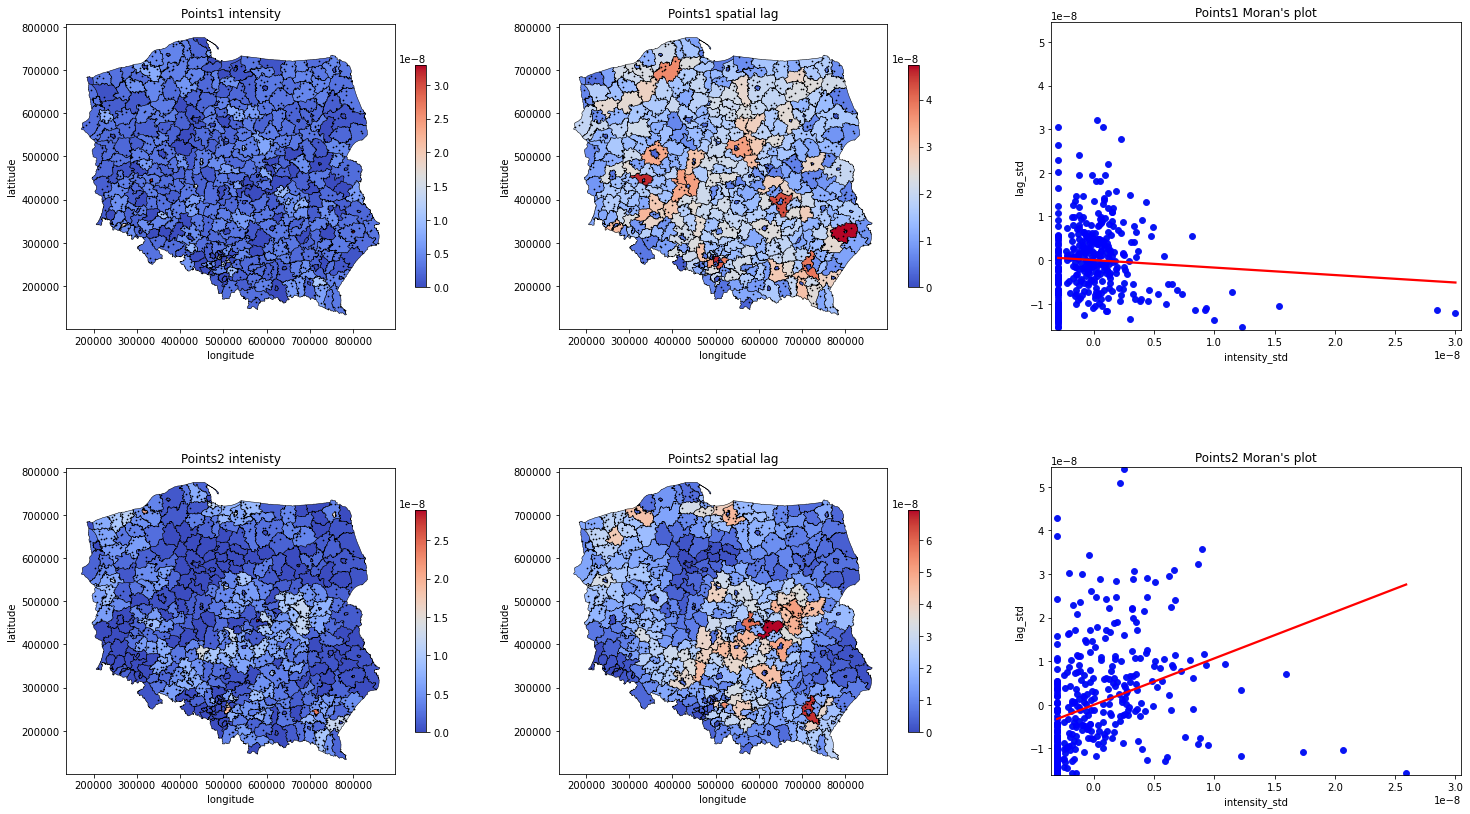

In [30]:
# YOUR CODE HERE

if np.min(df1.intensity_std) < np.min(df2.intensity_std):
    x_min = np.min(df1.intensity_std)
else:
    x_min = np.min(df2.intensity_std)
    
if np.max(df1.intensity_std) > np.max(df2.intensity_std):
    x_max = np.max(df1.intensity_std)
else:
    x_max = np.max(df2.intensity_std)
    
if np.min(df1.lag_std) < np.min(df2.lag_std):
    y_min = np.min(df1.lag_std)
else:
    y_min = np.min(df2.lag_std)
    
if np.max(df1.lag_std) > np.max(df2.lag_std):
    y_max = np.max(df1.lag_std)
else:
    y_max = np.max(df2.lag_std)
    
ratio = 0.75
fig,ax=plt.subplots(2,3,figsize=(25,15))

ax[0,0].set_title('Points1 intensity')
ax[0,0].set(aspect='equal', xlabel="longitude", ylabel="latitude")
base00 = df1.plot(ax = ax[0,0], column = 'intensity', cmap = 'coolwarm', legend=True, edgecolor='black', linewidth=0.5, legend_kwds={'shrink': 0.6})
p1.plot(ax = base00, markersize=0.5, zorder=2, color='black')

ax[0,1].set_title('Points1 spatial lag')
ax[0,1].set(aspect='equal', xlabel="longitude", ylabel="latitude")
base01 = df1.plot(ax = ax[0,1], column = 'lag', cmap = 'coolwarm', legend=True, edgecolor='black',linewidth=0.5, legend_kwds={'shrink': 0.6})
p1.plot(ax = base01, markersize=0.5, zorder=2, color='black')

ax[1,0].set_title('Points2 intenisty')
ax[1,0].set(aspect='equal', xlabel="longitude", ylabel="latitude")
base10 = df2.plot(ax = ax[1,0], column = 'intensity', cmap = 'coolwarm', legend=True, edgecolor='black',linewidth=0.5, legend_kwds={'shrink': 0.6})
p2.plot(ax = base10, markersize=0.5, zorder=2, color='black')

ax[1,1].set_title('Points2 spatial lag')
ax[1,1].set(aspect='equal', xlabel="longitude", ylabel="latitude")
base11 = df2.plot(ax = ax[1,1], column = 'lag', cmap = 'coolwarm', legend=True, edgecolor='black',linewidth=0.5, legend_kwds={'shrink': 0.6})
p2.plot(ax = base11, markersize=0.5, zorder=2, color='black')

ax[0,2].set_title("Points1 Moran's plot")
ax[0,2].set(aspect='equal')
ax[0,2].set_xlim([x_min-0.05e-8,x_max+0.05e-8])
ax[0,2].set_ylim([y_min-0.05e-8,y_max+0.05e-8])
x_left1, x_right1 = ax[0,2].get_xlim()
y_low1, y_high1 = ax[0,2].get_ylim()
ax[0,2].set_aspect(abs((x_right1-x_left1)/(y_low1-y_high1))*ratio)
sns.scatterplot(data=df1,x='intensity_std',y='lag_std',ax=ax[0,2])
sns.regplot(data=df1,x='intensity_std',y='lag_std',ax=ax[0,2],ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax[1,2].set_title("Points2 Moran's plot")
ax[1,2].set(aspect='equal')
ax[1,2].set_xlim([x_min-0.05e-8,x_max+0.05e-8])
ax[1,2].set_ylim([y_min-0.05e-8,y_max+0.05e-8])
x_left2, x_right2 = ax[1,2].get_xlim()
y_low2, y_high2 = ax[1,2].get_ylim()
ax[1,2].set_aspect(abs((x_right2-x_left2)/(y_low2-y_high2))*ratio)
sns.scatterplot(data=df2,x='intensity_std',y='lag_std',ax=ax[1,2])
sns.regplot(data=df2,x='intensity_std',y='lag_std',ax=ax[1,2],ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.show()

#raise NotImplementedError()